In [1]:
import pandas as pd
import numpy as np
import seaborn
import itertools
import matplotlib.pyplot as plt
from pathlib import Path

seaborn.set_context("paper")
seaborn.set_theme()
%matplotlib inline

In [2]:
def read_csv(fname):
    print(fname)
    df = pd.read_csv(fname)
    s = str(fname).split("/")
    df['model'] = s[1]
    compiler, arch, routine = s[2].split(".")[0:3]
    df['arch'] = arch
    df['compiler'] = compiler
    if routine == 'csv':
        routine = 'atomic'
    df['routine'] = routine
    print(compiler, arch, routine)
    return df

In [3]:
df = pd.concat(read_csv(f) for f in Path(".").glob("../*/*.csv"))

../openacc/nvidia.skylake.csv
nvidia skylake atomic
../openacc/nvidia.a100.csv
nvidia a100 atomic
../openacc/nvidia.skylake.no_atomic.csv
nvidia skylake no_atomic
../openacc/nvidia.v100.csv
nvidia v100 atomic
../openacc/cray.mi100.atomic.csv
cray mi100 atomic


In [4]:
df.head()

iteration  n  m  p      time    model     arch compiler routine
0          1  8  8  1  0.028374  openacc  skylake   nvidia  atomic
1          2  8  8  1  0.000060  openacc  skylake   nvidia  atomic
2          3  8  8  1  0.000041  openacc  skylake   nvidia  atomic
3          4  8  8  1  0.000043  openacc  skylake   nvidia  atomic
4          5  8  8  1  0.000068  openacc  skylake   nvidia  atomic

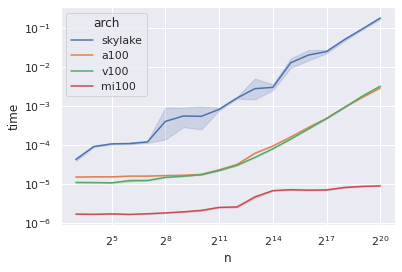

In [5]:
m = (df['model'] == 'openacc') & (df['p'] == 1) & (df['routine'] == 'atomic') & (df['m'] == 512)
ax = seaborn.lineplot(data=df[m], x='n', y='time', hue='arch')
ax.set(yscale='log')
ax.set_xscale('log', base=2)
plt.savefig("fill-array-openacc-by-arch-p1-m512.pdf")

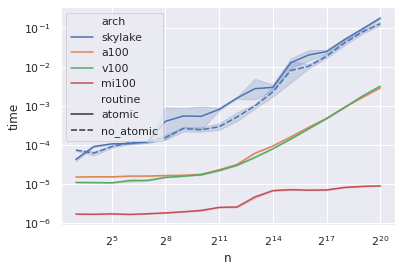

In [6]:
m = (df['model'] == 'openacc') & (df['p'] == 1) & (df['m'] == 512)
ax = seaborn.lineplot(data=df[m], x='n', y='time', hue='arch', style='routine')
ax.set(yscale='log')
ax.set_xscale('log', base=2)
ax.legend(ncol=1)
plt.savefig("fill-array-openacc-by-arch-p1-m512.pdf")

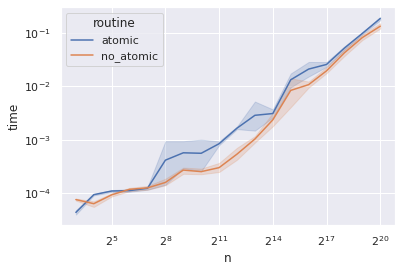

In [7]:
m = (df['model'] == 'openacc') & (df['m'] == 512) & (df['arch'] == 'skylake') & (df['p'] == 1)
ax = seaborn.lineplot(data=df[m], x='n', y='time', hue='routine')
ax.set(yscale='log')
ax.set_xscale('log', base=2)
plt.savefig("fill-array-cpu-atomic-penalty-p1-m512.pdf")
plt.savefig("fill-array-cpu-atomic-penalty-p1-m512.png")